In [1]:
library(magrittr)
library(ISLR)
library(MASS)
library(ggplot2)
library(grid)

Reading the data

In [2]:
auto_df <- Auto
head(auto_df)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


Understanding the data types in the dataset

In [3]:
str(auto_df)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [4]:
summary(auto_df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

Ploting `Horsepower` against `mpg`

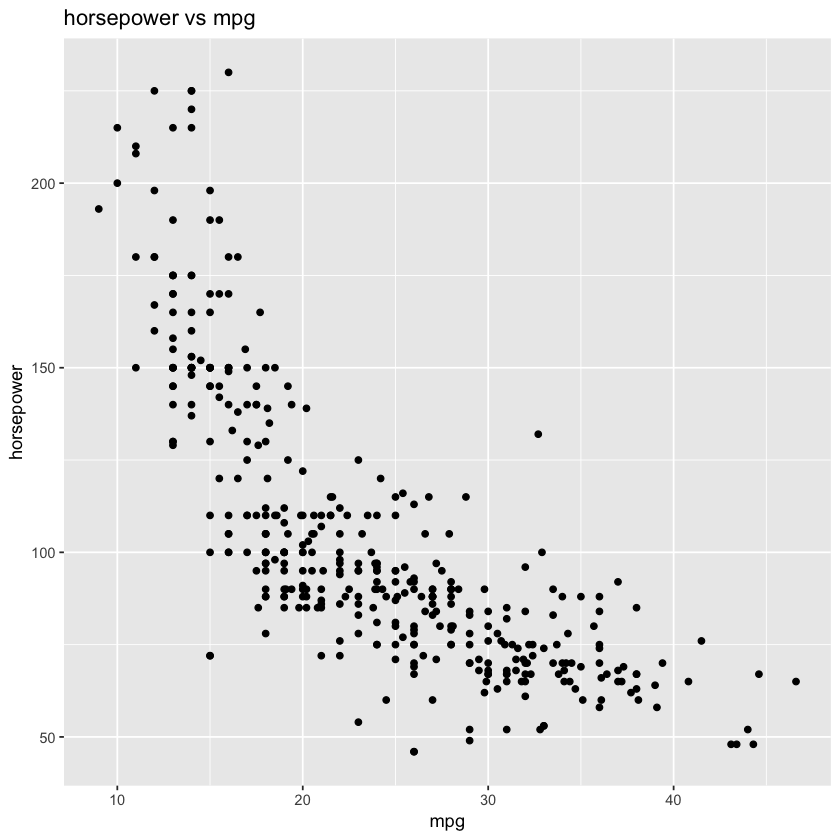

In [10]:
ggplot(auto_df) +
  geom_point(aes(x=mpg, y=horsepower)) +
  labs(title = "horsepower vs mpg")


Ploting `Horsepower` against `weight`

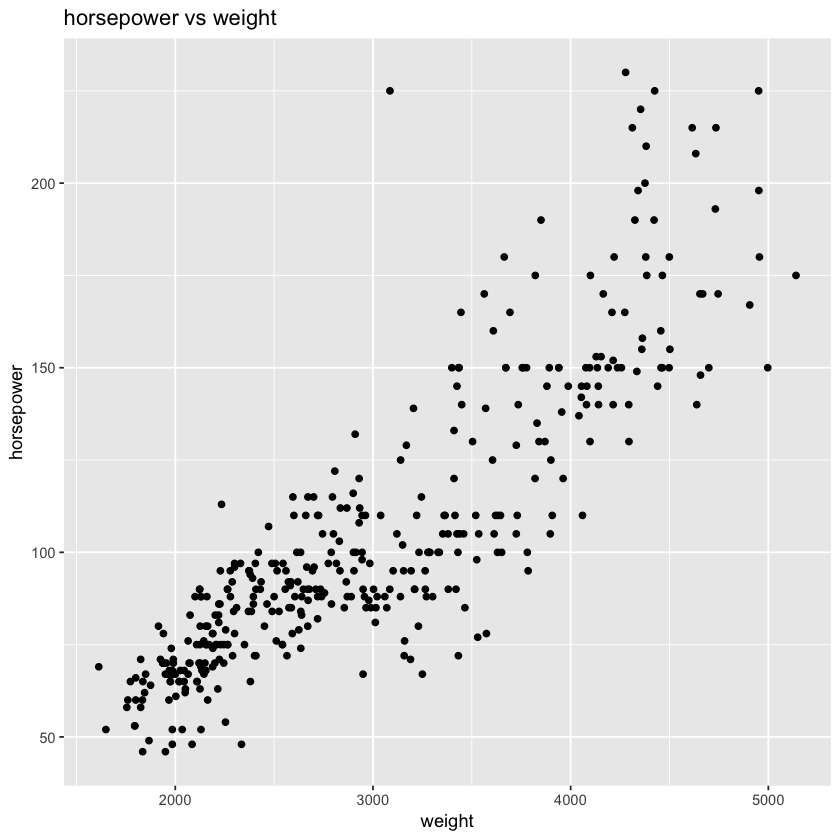

In [11]:
ggplot(auto_df) +
  geom_point(aes(x=weight, y=horsepower)) +
  labs(title = "horsepower vs weight")

#### Defining a  function to return $\hat{y}$

In [58]:
y_hat <- function(X, theta) {
    return(X %*% theta)
}

#### Defining the cost function (MSE)

In [59]:
cost <- function(yhat, y) {
    m <- length(y)
    return( (1/(2*m)) * sum((yhat - y)^2))
}

#### Defining the algorithm for gradient descent as a function

In [77]:
gradient_descent <- function(X, y, theta, alpha = 0.01, max_iter = 100) {
    m <- length(y)
    cost_history <- rep(0, max_iter)
    
    for (i in seq_along(1:max_iter)) {
        # Compute the predicted y_hat
        yhat <- y_hat(X, theta)
        
        # Compute the gradient 
        delta <- (1/m) * t(X) %*% (yhat - y)
        
         # Update the values of our thetas
        theta <- theta - alpha * delta
        
        # Compute the value of our cost function
        # Keep track of the cost at each iteration
        cost_history[i] <- cost(yhat, y)
    }
    
    return(list(
        "theta" = t(theta),
        "cost_history" = cost_history
    ))
}

#### Defining another version of the gradient descent function

This version of the gradient descent function uses a convergence threshold to stop iteration when the difference between the initial cost value and the subsequent cost value is equal to or greater than some user specified threshold value 

In [61]:
gradient_descent2 <- function(X, y, theta, conv_threshold = 0.01, alpha = 0.01, max_iter = 100) {
    m <- length(y)
    iter <- 1
    yhat <- y_hat(X, theta)
    init_cost <- cost(yhat, y)
    cost_history <- c(init_cost)
    converged <- F
    
    while(not(converged)) {
        # Compute the gradient
        delta <- (1/m) * (t(X) %*% (yhat - y)) 
        
        # Update the values of our thetas
        theta <- theta - alpha * delta
        
        # Compute the next predicted yhat
        yhat <- y_hat(X, theta)
        
        # Compute the value of our cost function
        new_cost <- cost(yhat, y)
        
        reached_threshold <- (abs(init_cost - new_cost) >= conv_threshold)

        if (not(reached_threshold) || iter < max_iter) {
            iter = iter + 1
            cost_history <- c(cost_history, new_cost)
        }
        else {
            converged = T
        }
    }
    
    return(list(
        "theta" = t(theta),
        "cost_history" = cost_history
    ))
}

#### Representing the Data for Imputation
Let's represent the values for `horsepower`, `weight`, `mpg` in a way that can be inputed into our gradient descent algorithm

In [34]:
n_obs <- nrow(auto_df)

y <- matrix(auto_df$horsepower, n_obs, 1)

X0 <- matrix(1, n_obs, 1)
X1 <- matrix(auto_df$mpg, n_obs, 1)
X2 <- matrix(auto_df$weight, n_obs, 1)
X <-  matrix(c(X0, X1, X2), nrow = length(y), ncol = 3)

Let's look at th shape of our $y$ and $X$

In [35]:
print("Shape of y")
print(paste(sprintf("%g", dim(y))))
print("Shape of X")
print(paste(sprintf("%g", dim(X))))

[1] "Shape of y"
[1] "392" "1"  
[1] "Shape of X"
[1] "392" "3"  


We now need to generate initial values for our $\theta$s. We do this because it serves as a starting point for our optimizer to begin with. The optimizers role is to update the values of these $\theta$s if there are not the best possible values

In [82]:
# Set the seed to ensure predictable results
set.seed(123)
init_theta <- matrix(rnorm(3), nrow = 3, ncol = 1)

print("Shape of 𝜃")
print(paste(sprintf("%g", dim(init_theta))))

[1] "Shape of 𝜃"
[1] "3" "1"


Let's get the first 10 values of our input data $y$, $X$, and $\theta$

##### $y$

In [53]:
y[1:10, 1]

[1] 130 165 150 150 140 198 220 215 225 190

##### $X$

In [49]:
X[1:10, ]

1,18,3504
1,15,3693
1,18,3436
1,16,3433
1,17,3449
1,15,4341
1,14,4354
1,14,4312
1,14,4425
1,15,3850


##### $\theta$

In [83]:
init_theta

-0.5604756
-0.2301775
1.5587083


#### Training with gradient descent

             𝜃0         𝜃1         𝜃2
[1,] -0.5609483 -0.2403997 0.03727929


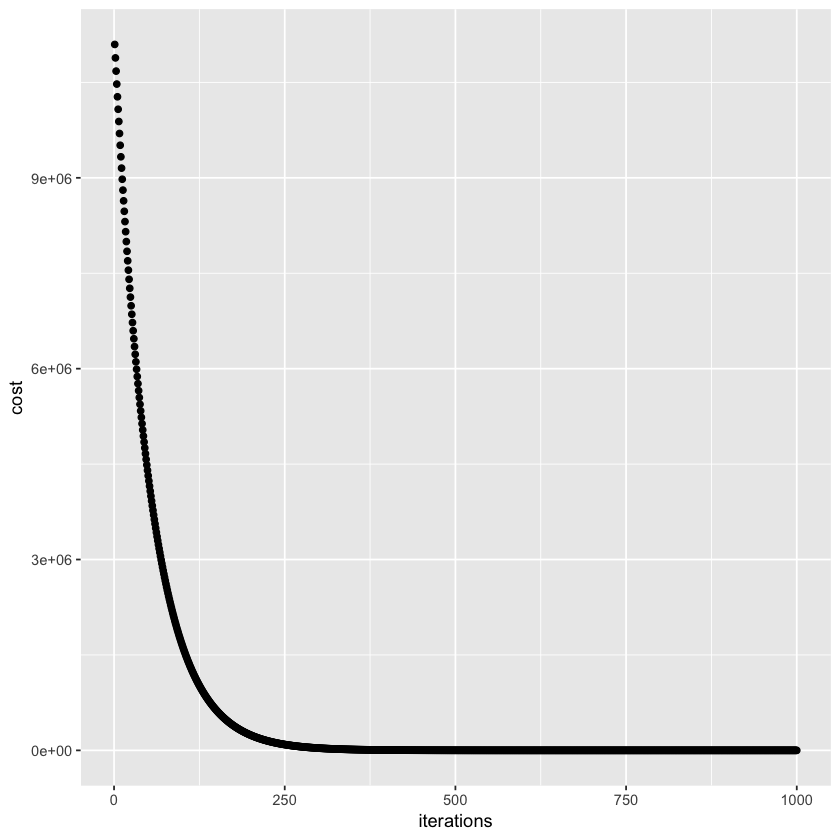

In [92]:
max_iter = 1000
result <- gradient_descent(X, y, init_theta, alpha = 1e-9, max_iter = max_iter) -> result

print(result$theta %>% set_colnames(c("𝜃0", "𝜃1", "𝜃2")))

data.df <- data.frame("iterations" = seq_along(1:max_iter), "cost" = result$cost_history)

ggplot(data.df, aes(x = iterations, y = cost)) +
geom_point()